<a href="https://colab.research.google.com/github/mayank1897/recommender-sytem/blob/main/instacart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
import warnings
warnings.filterwarnings("ignore")
import os
from zipfile import ZipFile 
import gc

#Data Uploading

In [ ]:
!pip install --upgrade --force-reinstall --no-deps kaggle

Processing /root/.cache/pip/wheels/3a/d1/7e/6ce09b72b770149802c653a02783821629146983ee5a360f10/kaggle-1.5.10-cp36-none-any.whl
  Found existing installation: kaggle 1.5.10
    Uninstalling kaggle-1.5.10:
      Successfully uninstalled kaggle-1.5.10


In [ ]:
from google.colab import files
files.upload()
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle (1).json
mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!kaggle -v

Kaggle API 1.5.10


In [ ]:
! kaggle datasets list

ref                                                          title                                           size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------  ---------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
arashnic/hr-analytics-job-change-of-data-scientists          HR Analytics: Job Change of Data Scientists    295KB  2020-12-07 00:25:10            479         49  1.0              
szymonjanowski/internet-articles-data-with-users-engagement  Internet news data with readers engagement       3MB  2020-11-21 17:09:57           3391        286  0.9411765        
sakshigoyal7/credit-card-customers                           Credit Card customers                          379KB  2020-11-19 07:38:44          11645        391  1.0              
imoore/2020-us-general-election-turnout-rates                2020 US General Election Turnout rates 

In [ ]:
! kaggle competitions download -c 'instacart-market-basket-analysis'

instacart-market-basket-analysis.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!mkdir instacart

mkdir: cannot create directory ‘instacart’: File exists


In [ ]:
!unzip "/content/instacart-market-basket-analysis.zip" -d instacart

Archive:  /content/instacart-market-basket-analysis.zip
replace instacart/aisles.csv.zip? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: instacart/aisles.csv.zip  
replace instacart/departments.csv.zip? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: instacart/departments.csv.zip  
replace instacart/order_products__prior.csv.zip? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: instacart/order_products__prior.csv.zip  y

replace instacart/order_products__train.csv.zip? [y]es, [n]o, [A]ll, [N]one, [r]ename:   inflating: instacart/order_products__train.csv.zip  
replace instacart/orders.csv.zip? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: instacart/orders.csv.zip  
replace instacart/products.csv.zip? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: instacart/products.csv.zip  
replace instacart/sample_submission.csv.zip? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: instacart/sample_submission.csv.zip  


In [ ]:
os.chdir("/content/instacart")

In [ ]:
!pwd

/content/instacart


In [ ]:
os.listdir("/content/instacart")

['aisles.csv.zip',
 'order_products__train.csv.zip',
 'departments.csv',
 'orders.csv.zip',
 'departments.csv.zip',
 'order_products__train.csv',
 'products.csv',
 'aisles.csv',
 '__MACOSX',
 'order_products__prior.csv.zip',
 'sample_submission.csv.zip',
 'order_products__prior.csv',
 'products.csv.zip',
 'sample_submission.csv',
 'orders.csv']

In [ ]:
for i in os.listdir("/content/instacart"):
    with ZipFile(i,"r") as new_file:
        new_file.extractall()

# 1- EDA on Orders made by the customers

In [ ]:
df_order_products_prior=pd.read_csv("order_products__prior.csv")
df_order_products__train=pd.read_csv("order_products__train.csv")
df_aisle=pd.read_csv("aisles.csv")
df_department=pd.read_csv("departments.csv")
df_products=pd.read_csv("products.csv")
df_order_products__train_copy=df_order_products__train.copy()

In [ ]:
df_order_products__train

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1
...,...,...,...,...
1384612,3421063,14233,3,1
1384613,3421063,35548,4,1
1384614,3421070,35951,1,1
1384615,3421070,16953,2,1


In [ ]:
df_orders=pd.read_csv("orders.csv")

In [ ]:
df_orders

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
...,...,...,...,...,...,...,...
3421078,2266710,206209,prior,10,5,18,29.0
3421079,1854736,206209,prior,11,4,10,30.0
3421080,626363,206209,prior,12,1,12,18.0
3421081,2977660,206209,prior,13,1,12,7.0


In [ ]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421083 entries, 0 to 3421082
Data columns (total 7 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   eval_set                object 
 3   order_number            int64  
 4   order_dow               int64  
 5   order_hour_of_day       int64  
 6   days_since_prior_order  float64
dtypes: float64(1), int64(5), object(1)
memory usage: 182.7+ MB


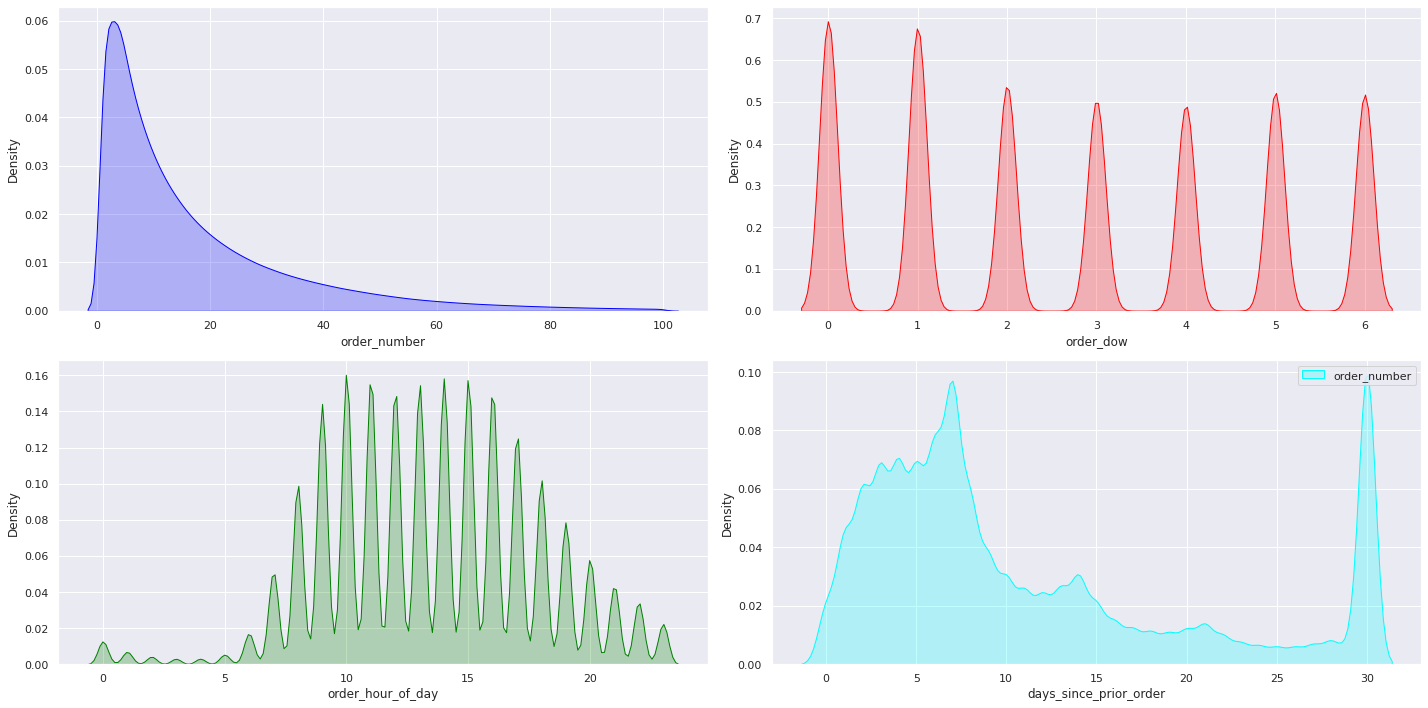

In [ ]:
#checking the distribution of different features
fig,axs=plt.subplots(2,2,figsize=(20,10))
plt1=sns.kdeplot(df_orders.order_number,shade=True,ax=axs[0][0],color="blue")
plt2=sns.kdeplot(df_orders.order_dow,shade=True,ax=axs[0][1],color="red")
plt3=sns.kdeplot(df_orders.order_hour_of_day,shade=True,ax=axs[1][0],color="green")
plt4=sns.kdeplot(df_orders.days_since_prior_order,shade=True,ax=axs[1][1],color="cyan")
plt.tight_layout()
plt.legend(labels=["order_number","order_dow","order_hour_of_day","days_since_prior_order"])
plt.show()

In [ ]:
df_orders.describe()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
count,3.421083e+06,3.421083e+06,3.421083e+06,3.421083e+06,3.421083e+06,3.214874e+06
mean,1.710542e+06,1.029782e+05,1.715486e+01,2.776219e+00,1.345202e+01,1.111484e+01
std,9.875817e+05,5.953372e+04,1.773316e+01,2.046829e+00,4.226088e+00,9.206737e+00
min,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.552715e+05,5.139400e+04,5.000000e+00,1.000000e+00,1.000000e+01,4.000000e+00
50%,1.710542e+06,1.026890e+05,1.100000e+01,3.000000e+00,1.300000e+01,7.000000e+00
75%,2.565812e+06,1.543850e+05,2.300000e+01,5.000000e+00,1.600000e+01,1.500000e+01
max,3.421083e+06,2.062090e+05,1.000000e+02,6.000000e+00,2.300000e+01,3.000000e+01


In [ ]:
#total number of null values in 'days_since_prior_order' feature
np.sum(df_orders.days_since_prior_order.isnull())

206209

In [ ]:
df_orders_rem_cp=df_orders.copy()
df_orders_rem_cp.dropna(axis=0,inplace=True) # removing rows having nan values

In [ ]:
df_orders_rem_cp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214874 entries, 1 to 3421082
Data columns (total 7 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   eval_set                object 
 3   order_number            int64  
 4   order_dow               int64  
 5   order_hour_of_day       int64  
 6   days_since_prior_order  float64
dtypes: float64(1), int64(5), object(1)
memory usage: 196.2+ MB


In [ ]:
df_orders_rem_cp

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
5,3367565,1,prior,6,2,7,19.0
...,...,...,...,...,...,...,...
3421078,2266710,206209,prior,10,5,18,29.0
3421079,1854736,206209,prior,11,4,10,30.0
3421080,626363,206209,prior,12,1,12,18.0
3421081,2977660,206209,prior,13,1,12,7.0


In [ ]:
from sklearn.covariance import EllipticEnvelope

In [ ]:
en=EllipticEnvelope(random_state=42,contamination=0.1)

In [ ]:
pred_out=en.fit_predict(df_orders_rem_cp.iloc[:,-1:])
pred_out

array([ 1,  1,  1, ...,  1,  1, -1])

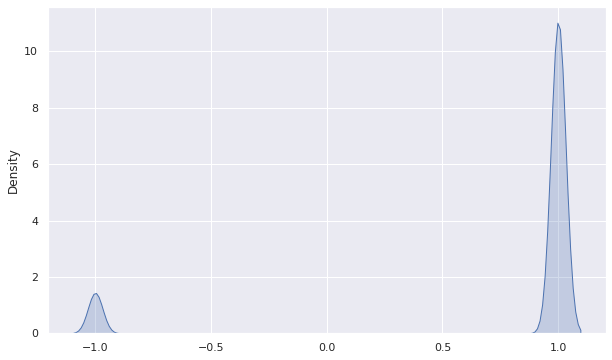

In [ ]:
fig=plt.gcf()
fig.set_size_inches((10,6))
sns.kdeplot(pred_out,shade=True)

In [ ]:
print("Variance has been increased by=",str(round((((84.764006187169 - 80.099779223104)/80.099779223104)*100),2))+" "+"%")

Variance has been increased by= 5.82 %


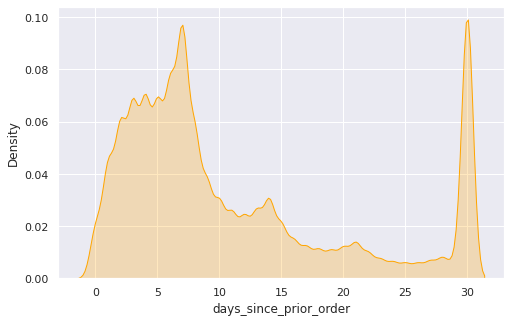

In [ ]:
#variance has been increased by 5.82 %
fig=plt.gcf()
fig.set_size_inches((8,5))
sns.kdeplot(df_orders_rem_cp.iloc[:,-1],shade=True,color="orange")

In [ ]:
df_orders_rem_cp.days_since_prior_order=df_orders_rem_cp.days_since_prior_order.astype(int)
df_orders_rem_cp.order_number=df_orders_rem_cp.order_number.astype(int)
df_orders_rem_cp.order_dow=df_orders_rem_cp.order_dow.astype(int)
df_orders_rem_cp.order_hour_of_day=df_orders_rem_cp.order_hour_of_day.astype(int)
df_orders_rem_cp.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
1,2398795,1,prior,2,3,7,15
2,473747,1,prior,3,3,12,21
3,2254736,1,prior,4,4,7,29
4,431534,1,prior,5,4,15,28
5,3367565,1,prior,6,2,7,19


In [ ]:
df_orders_rem_cp.days_since_prior_order.describe()

count    3.214874e+06
mean     1.111484e+01
std      9.206737e+00
min      0.000000e+00
25%      4.000000e+00
50%      7.000000e+00
75%      1.500000e+01
max      3.000000e+01
Name: days_since_prior_order, dtype: float64

##1- Inventory Management

In [ ]:
df_orders_rem_cp

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
1,2398795,1,prior,2,3,7,15
2,473747,1,prior,3,3,12,21
3,2254736,1,prior,4,4,7,29
4,431534,1,prior,5,4,15,28
5,3367565,1,prior,6,2,7,19
...,...,...,...,...,...,...,...
3421078,2266710,206209,prior,10,5,18,29
3421079,1854736,206209,prior,11,4,10,30
3421080,626363,206209,prior,12,1,12,18
3421081,2977660,206209,prior,13,1,12,7


In [ ]:
df_orders_rem_cp.groupby("user_id")["order_number"].agg("count").to_frame().reset_index()

,user_id,order_number
0,1,10
1,2,14
2,3,12
3,4,5
4,5,4
...,...,...
206204,206205,3
206205,206206,67
206206,206207,16
206207,206208,49


In [ ]:
len(df_orders_rem_cp[(df_orders_rem_cp.order_dow==0) & (df_orders_rem_cp.order_hour_of_day==14)])

51038

In [ ]:
#checking the total number of customers giving orders on a particular day at a particular time(in hours)
df_day_hour=pd.crosstab(df_orders_rem_cp.order_dow,df_orders_rem_cp.order_hour_of_day)
df_day_hour

order_hour_of_day,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
order_dow,,,,,,,,,,,,,,,,,,,,,,,,
0,3690,2245,1296,902,756,1093,3143,11762,26514,38363,45398,47806,48035,50372,51038,50427,46136,37056,27588,21126,17062,13577,10543,6460
1,3429,1723,1020,696,756,1523,5078,15725,32382,49136,52679,48611,44126,43894,43986,43590,41930,34407,27046,20687,15223,11196,8417,5245
2,2843,1472,878,683,696,1317,4511,12606,23343,34351,36997,35784,33626,34455,34946,35249,35239,30092,24797,18794,14045,10032,7649,4994
3,2760,1398,893,608,676,1279,4345,11775,21338,30578,34032,33203,31456,32141,32665,33878,33156,28483,23399,17991,12977,9681,7735,4867
4,2476,1415,841,644,695,1253,4184,11893,20682,29670,33070,31969,30337,30924,31696,32244,32034,27697,22935,18140,13326,10198,8275,5305
5,2987,1568,952,780,846,1502,4632,12770,22789,32342,36195,35816,33593,34185,35351,35379,33770,28131,22806,17517,12500,8945,7013,4926
6,3080,1815,1130,804,739,1056,3063,10696,21696,29012,33397,34623,34673,35116,36325,35608,33194,28342,22562,17128,12486,9842,7973,5710


In [ ]:
df_day_hour.set_axis(["Mon","Tues","Wed","Thurs","Fri","Sat","Sun"],axis=0,inplace=True)

In [ ]:
# prior customers report

#here:-
# red -------> max
# blue ------> min
# gives the maximum and minimum number of customers giving orders on a particular day at a particular time(in hours)

# It helps in Inventory Management 
# Here on maximum days at 10 hour most of the customers place their orders and between 3-4 hour very few customers place their orders so, the manager can manage the inventory accordingly.
df_day_hour.style.highlight_max(axis=1,color="red").highlight_min(axis=1,color="blue")

order_hour_of_day,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
Mon,3690,2245,1296,902,756,1093,3143,11762,26514,38363,45398,47806,48035,50372,51038,50427,46136,37056,27588,21126,17062,13577,10543,6460
Tues,3429,1723,1020,696,756,1523,5078,15725,32382,49136,52679,48611,44126,43894,43986,43590,41930,34407,27046,20687,15223,11196,8417,5245
Wed,2843,1472,878,683,696,1317,4511,12606,23343,34351,36997,35784,33626,34455,34946,35249,35239,30092,24797,18794,14045,10032,7649,4994
Thurs,2760,1398,893,608,676,1279,4345,11775,21338,30578,34032,33203,31456,32141,32665,33878,33156,28483,23399,17991,12977,9681,7735,4867
Fri,2476,1415,841,644,695,1253,4184,11893,20682,29670,33070,31969,30337,30924,31696,32244,32034,27697,22935,18140,13326,10198,8275,5305
Sat,2987,1568,952,780,846,1502,4632,12770,22789,32342,36195,35816,33593,34185,35351,35379,33770,28131,22806,17517,12500,8945,7013,4926
Sun,3080,1815,1130,804,739,1056,3063,10696,21696,29012,33397,34623,34673,35116,36325,35608,33194,28342,22562,17128,12486,9842,7973,5710


In [ ]:
df_orders_train_test=df_orders_rem_cp[(df_orders_rem_cp.eval_set=="train") | (df_orders_rem_cp.eval_set=="test")]
df_orders_train_test

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
10,1187899,1,train,11,4,8,14
25,1492625,2,train,15,1,11,30
38,2774568,3,test,13,5,15,11
44,329954,4,test,6,3,12,30
49,2196797,5,train,5,0,11,6
...,...,...,...,...,...,...,...
3420933,1716008,206205,train,4,1,16,10
3421001,1043943,206206,test,68,0,20,0
3421018,2821651,206207,test,17,2,13,14
3421068,803273,206208,test,50,5,11,4


In [ ]:
df_orders_train_test=pd.crosstab(df_orders_train_test.order_dow,df_orders_train_test.order_hour_of_day)
df_orders_train_test

order_hour_of_day,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
order_dow,,,,,,,,,,,,,,,,,,,,,,,,
0,244,163,110,75,63,92,191,880,1885,2808,3466,3678,3714,3852,4068,3934,3533,2879,2225,1682,1293,998,806,494
1,199,95,42,37,48,84,269,779,1553,2375,2672,2576,2529,2493,2544,2490,2561,2182,1684,1219,859,651,534,298
2,153,87,51,40,44,69,234,695,1147,1815,1972,1942,2028,2004,2071,2061,2059,1935,1584,1162,816,582,475,279
3,185,88,64,49,53,90,248,657,1248,1659,2024,1940,1875,1967,1910,2081,1989,1749,1465,1144,731,560,510,286
4,166,98,62,46,36,79,266,670,1217,1764,1978,2008,1912,1973,1960,2127,1918,1801,1553,1156,835,627,538,337
5,200,133,63,45,53,108,293,844,1392,1974,2108,2220,2213,2179,2276,2290,2160,1869,1610,1228,765,559,492,312
6,239,138,77,62,55,75,236,687,1438,1921,2313,2358,2364,2357,2657,2524,2384,2300,1793,1358,884,696,573,424


In [ ]:
df_orders_train_test.set_axis(["Mon","Tues","Wed","Thurs","Fri","Sat","Sun"],axis=0,inplace=True)

In [ ]:
# future customers report

#here:-
# red -------> max
# blue ------> min
# gives the maximum and minimum number of customers giving orders on a particular day at a particular time(in hours)

# It helps in Inventory Management 
# Here on maximum days between 14-15 hour most of the customers place their orders and between 3-4 hour very few customers place their orders so, the manager can manage the inventory accordingly.
df_orders_train_test.style.highlight_max(color="red",axis=1).highlight_min(color="blue",axis=1)

order_hour_of_day,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
Mon,244,163,110,75,63,92,191,880,1885,2808,3466,3678,3714,3852,4068,3934,3533,2879,2225,1682,1293,998,806,494
Tues,199,95,42,37,48,84,269,779,1553,2375,2672,2576,2529,2493,2544,2490,2561,2182,1684,1219,859,651,534,298
Wed,153,87,51,40,44,69,234,695,1147,1815,1972,1942,2028,2004,2071,2061,2059,1935,1584,1162,816,582,475,279
Thurs,185,88,64,49,53,90,248,657,1248,1659,2024,1940,1875,1967,1910,2081,1989,1749,1465,1144,731,560,510,286
Fri,166,98,62,46,36,79,266,670,1217,1764,1978,2008,1912,1973,1960,2127,1918,1801,1553,1156,835,627,538,337
Sat,200,133,63,45,53,108,293,844,1392,1974,2108,2220,2213,2179,2276,2290,2160,1869,1610,1228,765,559,492,312
Sun,239,138,77,62,55,75,236,687,1438,1921,2313,2358,2364,2357,2657,2524,2384,2300,1793,1358,884,696,573,424


#2- Classification of customers who are reordering

##1- Data Preprocessing

In [ ]:
df_products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [ ]:
df_aisle.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [ ]:
#merging products with their categories
df_products_aisle=pd.merge(df_products,df_aisle,how="left")
df_products_aisle.head()

,product_id,product_name,aisle_id,department_id,aisle
0,1,Chocolate Sandwich Cookies,61,19,cookies cakes
1,2,All-Seasons Salt,104,13,spices seasonings
2,3,Robust Golden Unsweetened Oolong Tea,94,7,tea
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,frozen meals
4,5,Green Chile Anytime Sauce,5,13,marinades meat preparation


In [ ]:
df_department.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [ ]:
#merging products,categories with their departments
df_products_aisle_depart=pd.merge(df_products_aisle,df_department,how="left")
df_products_aisle_depart.head()

,product_id,product_name,aisle_id,department_id,aisle,department
0,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks
1,2,All-Seasons Salt,104,13,spices seasonings,pantry
2,3,Robust Golden Unsweetened Oolong Tea,94,7,tea,beverages
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,frozen meals,frozen
4,5,Green Chile Anytime Sauce,5,13,marinades meat preparation,pantry


In [ ]:
df_products_aisle_depart.drop(["aisle_id","department_id"],axis=1,inplace=True)

In [ ]:
df_products_aisle_depart.head()

,product_id,product_name,aisle,department
0,1,Chocolate Sandwich Cookies,cookies cakes,snacks
1,2,All-Seasons Salt,spices seasonings,pantry
2,3,Robust Golden Unsweetened Oolong Tea,tea,beverages
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,frozen meals,frozen
4,5,Green Chile Anytime Sauce,marinades meat preparation,pantry


In [ ]:
#customers past data
df_order_products_prior

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0
...,...,...,...,...
32434484,3421083,39678,6,1
32434485,3421083,11352,7,0
32434486,3421083,4600,8,0
32434487,3421083,24852,9,1


In [ ]:
#number of products purchased in each order_id (starting order_id is 2)
df_order_products_prior.groupby("order_id")["product_id"].agg("count").to_frame().reset_index()

,order_id,product_id
0,2,9
1,3,8
2,4,13
3,5,26
4,6,3
...,...,...
3214869,3421079,1
3214870,3421080,9
3214871,3421081,7
3214872,3421082,7


In [ ]:
#number of products purchased in each order_id (starting order_id is 1)
df_order_products__train.groupby("order_id")["product_id"].agg("count").sort_index().to_frame().reset_index()

,order_id,product_id
0,1,8
1,36,8
2,38,9
3,96,7
4,98,49
...,...,...
131204,3421049,6
131205,3421056,5
131206,3421058,8
131207,3421063,4


In [ ]:
#concatinating prior and train data (as some data is in train data set) in order to get full data
df_full_data=pd.concat([df_order_products__train_copy,df_order_products_prior])
df_full_data=df_full_data.sort_index()

In [ ]:
#from here we get to know the number of products ordered in each order_id
df_full_data.groupby("order_id")["product_id"].agg("count").sort_index().to_frame().reset_index()

,order_id,product_id
0,1,8
1,2,9
2,3,8
3,4,13
4,5,26
...,...,...
3346078,3421079,1
3346079,3421080,9
3346080,3421081,7
3346081,3421082,7


In [ ]:
#final data
df_final_data=pd.merge(df_full_data,df_products_aisle_depart,how="left")
target=df_final_data.reordered
df_final_data.drop("reordered",axis=1,inplace=True)
df_final_data["reordered"]=target
df_final_data

,order_id,product_id,add_to_cart_order,product_name,aisle,department,reordered
0,1,49302,1,Bulgarian Yogurt,yogurt,dairy eggs,1
1,2,33120,1,Organic Egg Whites,eggs,dairy eggs,1
2,2,28985,2,Michigan Organic Kale,fresh vegetables,produce,1
3,1,11109,2,Organic 4% Milk Fat Whole Milk Cottage Cheese,other creams cheeses,dairy eggs,1
4,1,10246,3,Organic Celery Hearts,fresh vegetables,produce,0
...,...,...,...,...,...,...,...
33819101,3421083,39678,6,Free & Clear Natural Dishwasher Detergent,dish detergents,household,1
33819102,3421083,11352,7,Organic Mini Sandwich Crackers Peanut Butter,crackers,snacks,0
33819103,3421083,4600,8,All Natural French Toast Sticks,frozen breakfast,frozen,0
33819104,3421083,24852,9,Banana,fresh fruits,produce,1


In [ ]:
df_final_data.product_name.nunique()

49685

In [ ]:
df_final_data_copy=df_final_data.copy()
df_final_data_copy=df_final_data_copy.iloc[:3500000,:]

In [ ]:
#transforming the final_data into product table 
c=[]
for order_ids in df_final_data_copy.order_id.unique():
    df_ord_i=df_final_data_copy[df_final_data_copy.order_id==order_ids]
    df_ord_i=df_ord_i.pivot(index="order_id",columns="product_name",values="product_name")
    df_ord_i.set_axis(range(len(df_ord_i.columns)),axis=1,inplace=True)
    c.append(df_ord_i)

In [ ]:
df_prepared=pd.concat(c)

In [ ]:
df_prepared=df_prepared.sort_index()
df_prepared

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126
order_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,Bag of Organic Bananas,Bulgarian Yogurt,Cucumber Kirby,Lightly Smoked Sardines in Olive Oil,Organic 4% Milk Fat Whole Milk Cottage Cheese,Organic Celery Hearts,Organic Hass Avocado,Organic Whole String Cheese,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,All Natural No Stir Creamy Almond Butter,Carrots,Classic Blend Cole Slaw,Coconut Butter,Garlic Powder,Michigan Organic Kale,Natural Sweetener,Organic Egg Whites,Original Unflavored Gelatine Mix,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Air Chilled Organic Boneless Skinless Chicken ...,Lemons,Organic Baby Spinach,Organic Ezekiel 49 Bread Cinnamon Raisin,Organic Ginger Root,Total 2% with Strawberry Lowfat Greek Strained...,Unsweetened Almondmilk,Unsweetened Chocolate Almond Breeze Almond Milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Chewy 25% Low Sugar Chocolate Chip Granola,Energy Drink,Goldfish Cheddar Baked Snack Crackers,Honey/Lemon Cough Drops,Kellogg's Nutri-Grain Apple Cinnamon Cereal,Kellogg's Nutri-Grain Blueberry Cereal,Nutri-Grain Soft Baked Strawberry Cereal Break...,Oats & Chocolate Chewy Bars,Original Orange Juice,Plain Pre-Sliced Bagels,Sugarfree Energy Drink,Tiny Twists Pretzels,Traditional Snack Mix,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2% Reduced Fat Milk,American Slices Cheese,Apricot Preserves,Artichokes,Bag of Organic Bananas,Bag of Organic Lemons,Biscuits Orange Pim's,Boneless Skinless Chicken Breast Fillets,Clementines,Dairy Milk Fruit & Nut Chocolate Bar,Everyday Facial Tissues,French Lavender Hand Wash,Fresh Fruit Salad,"Just Crisp, Parmesan",Macaroni And Cheese,"Matzos, Thin, Tea",Meyer Lemon,Mini Original Babybel Cheese,"Natural Artesian Water, Mini & Mobile",One Ply Choose A Size Big Roll Paper Towel Rolls,Organic Hass Avocado,Organic Raspberries,Original Black Box Tablewater Cracker,Sensitive Toilet Paper,Spaghetti Pasta,"Wafer, Chocolate",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3421049,Gluten Free Rice Bread,Lemon Sports Drink,Organic Baby Broccoli,Organic Baby Kale Mix,Organic Grated Ginger,Organic Whole Grain Wheat English Muffins,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [ ]:
df_prepared.to_csv("order_product_prepared.csv",index=False)

##2- Models 


### 1- Recommender Model (Market Basket Analysis)
Association Rule Learning

In [ ]:
df_prepared=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/order_product_prepared.csv")

In [ ]:
transaction=[]
for i,value in df_prepared.iterrows():
    transaction.append(list(value.values.astype(str)))

In [ ]:
!pip install apyori

  Created wheel for apyori: filename=apyori-1.1.2-cp36-none-any.whl size=5977 sha256=203f1f1d405e1ecefb21a8339f9a9170285b3ea0495b4b31f78573afc45c9994
  Stored in directory: /root/.cache/pip/wheels/5d/92/bb/474bbadbc8c0062b9eb168f69982a0443263f8ab1711a8cad0
Successfully built apyori


In [ ]:
from apyori import apriori

In [ ]:
rules=apriori(transactions=transaction,min_support=0.01,min_confidence=0.20,min_lift=1.2,min_length=2,max_length=10)

In [ ]:
results=list(rules)
results

[RelationRecord(items=frozenset({'Bag of Organic Bananas', 'Organic Baby Spinach'}), support=0.016286577826624536, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Organic Baby Spinach'}), items_add=frozenset({'Bag of Organic Bananas'}), confidence=0.2172538598982911, lift=1.8391473468624306)]),
 RelationRecord(items=frozenset({'Bag of Organic Bananas', 'Organic Hass Avocado'}), support=0.018862481110042587, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Organic Hass Avocado'}), items_add=frozenset({'Bag of Organic Bananas'}), confidence=0.30637063483208743, lift=2.5935591683930506)]),
 RelationRecord(items=frozenset({'Bag of Organic Bananas', 'Organic Raspberries'}), support=0.01303063607638412, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Organic Raspberries'}), items_add=frozenset({'Bag of Organic Bananas'}), confidence=0.307330903199676, lift=2.6016882530562793)]),
 RelationRecord(items=frozenset({'Bag of Organic Bananas', 'Organic Strawberrie

In [ ]:
# transforming the data into a table
# customers who're buying items in LHS are also buying items in RHS 
def inspect(results):
    lhs=[list(result[2][0][0]) for result in results]
    rhs=[list(result[2][0][1]) for result in results]
    support=[result[1] for result in results]
    confidence=[result[2][0][2] for result in results]
    lift=[result[2][0][3] for result in results]
    return list(zip(lhs,rhs,support,confidence,lift))
df_results=pd.DataFrame(inspect(results),columns=["LHS","RHS","Support","Confidence","Lift"])
for i,value in df_results.iterrows():
   if (('nan' in value.get("LHS")) or ('nan' in value.get("RHS"))):
       df_results.drop(i,axis=0,inplace=True)
df_results 

,LHS,RHS,Support,Confidence,Lift
0,[Organic Baby Spinach],[Bag of Organic Bananas],0.016287,0.217254,1.839147
1,[Organic Hass Avocado],[Bag of Organic Bananas],0.018862,0.306371,2.593559
2,[Organic Raspberries],[Bag of Organic Bananas],0.013031,0.307331,2.601688
3,[Organic Strawberries],[Bag of Organic Bananas],0.021047,0.255121,2.159707
4,[Large Lemon],[Banana],0.014346,0.266356,1.829409
5,[Organic Avocado],[Banana],0.016675,0.301628,2.071663
6,[Organic Baby Spinach],[Banana],0.015723,0.209740,1.440554
7,[Organic Strawberries],[Banana],0.017224,0.208784,1.433989
8,[Strawberries],[Banana],0.013903,0.297428,2.042820
9,[Limes],[Large Lemon],0.010005,0.223784,4.154893


###2- Classification

In [ ]:
#users having items in their cart 
df_final_data_copy.groupby("add_to_cart_order").agg("count")

,order_id,product_id,product_name,aisle,department,reordered
add_to_cart_order,,,,,,
1,340771,340771,340771,340771,340771,340771
2,323554,323554,323554,323554,323554,323554
3,303954,303954,303954,303954,303954,303954
4,282555,282555,282555,282555,282555,282555
5,259965,259965,259965,259965,259965,259965
...,...,...,...,...,...,...
123,1,1,1,1,1,1
124,1,1,1,1,1,1
125,1,1,1,1,1,1


In [ ]:
df_final_data_copy.head()

,order_id,product_id,add_to_cart_order,product_name,aisle,department,reordered
0,1,49302,1,Bulgarian Yogurt,yogurt,dairy eggs,1
1,2,33120,1,Organic Egg Whites,eggs,dairy eggs,1
2,2,28985,2,Michigan Organic Kale,fresh vegetables,produce,1
3,1,11109,2,Organic 4% Milk Fat Whole Milk Cottage Cheese,other creams cheeses,dairy eggs,1
4,1,10246,3,Organic Celery Hearts,fresh vegetables,produce,0


In [ ]:
df_orders_rem_cp.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
1,2398795,1,prior,2,3,7,15
2,473747,1,prior,3,3,12,21
3,2254736,1,prior,4,4,7,29
4,431534,1,prior,5,4,15,28
5,3367565,1,prior,6,2,7,19


In [ ]:
df_orders_rem_cp[df_orders_rem_cp.order_id==1]

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
1868044,1,112108,train,4,4,10,9


In [ ]:
#user data
df_users_data=pd.merge(df_final_data_copy,df_orders_rem_cp,how="left",on="order_id")

In [ ]:
df_users_data.head()

,order_id,product_id,add_to_cart_order,product_name,aisle,department,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1,49302,1,Bulgarian Yogurt,yogurt,dairy eggs,1,112108.0,train,4.0,4.0,10.0,9.0
1,2,33120,1,Organic Egg Whites,eggs,dairy eggs,1,202279.0,prior,3.0,5.0,9.0,8.0
2,2,28985,2,Michigan Organic Kale,fresh vegetables,produce,1,202279.0,prior,3.0,5.0,9.0,8.0
3,1,11109,2,Organic 4% Milk Fat Whole Milk Cottage Cheese,other creams cheeses,dairy eggs,1,112108.0,train,4.0,4.0,10.0,9.0
4,1,10246,3,Organic Celery Hearts,fresh vegetables,produce,0,112108.0,train,4.0,4.0,10.0,9.0


In [ ]:
df_users_data.columns

Index(['order_id', 'product_id', 'add_to_cart_order', 'product_name', 'aisle',
       'department', 'reordered', 'user_id', 'eval_set', 'order_number',
       'order_dow', 'order_hour_of_day', 'days_since_prior_order'],
      dtype='object')

In [ ]:
columns_rearranged=['user_id','order_id', 'product_id', 'add_to_cart_order', 'product_name', 'aisle',
       'department', 'eval_set', 'order_number',
       'order_dow', 'order_hour_of_day', 'days_since_prior_order', 'reordered']

In [ ]:
df_users_data=df_users_data.reindex(columns=columns_rearranged)
df_users_data.dropna(axis=0,inplace=True)
df_users_data.sort_values("user_id",inplace=True)

In [ ]:
df_users_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3364326 entries, 968847 to 222541
Data columns (total 13 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   user_id                 float64
 1   order_id                int64  
 2   product_id              int64  
 3   add_to_cart_order       int64  
 4   product_name            object 
 5   aisle                   object 
 6   department              object 
 7   eval_set                object 
 8   order_number            float64
 9   order_dow               float64
 10  order_hour_of_day       float64
 11  days_since_prior_order  float64
 12  reordered               int64  
dtypes: float64(5), int64(4), object(4)
memory usage: 359.3+ MB


In [ ]:
df_users_data[["user_id","order_number","order_dow","order_hour_of_day","days_since_prior_order"]]=df_users_data[["user_id","order_number","order_dow","order_hour_of_day","days_since_prior_order"]].astype(int)
df_users_data.set_axis(range(len(df_users_data)),axis=0,inplace=True)

In [ ]:
df_users_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3364326 entries, 968847 to 222541
Data columns (total 13 columns):
 #   Column                  Dtype 
---  ------                  ----- 
 0   user_id                 int64 
 1   order_id                int64 
 2   product_id              int64 
 3   add_to_cart_order       int64 
 4   product_name            object
 5   aisle                   object
 6   department              object
 7   eval_set                object
 8   order_number            int64 
 9   order_dow               int64 
 10  order_hour_of_day       int64 
 11  days_since_prior_order  int64 
 12  reordered               int64 
dtypes: int64(9), object(4)
memory usage: 359.3+ MB


In [ ]:
df_users_data.head()

,user_id,order_id,product_id,add_to_cart_order,product_name,aisle,department,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,reordered
0,1,1187899,26405,4,XL Pick-A-Size Paper Towel Rolls,paper goods,household,train,11,4,8,14,1
1,1,1187899,13032,7,Cinnamon Toast Crunch,cereal,breakfast,train,11,4,8,14,1
2,1,1187899,25133,2,Organic String Cheese,packaged cheese,dairy eggs,train,11,4,8,14,1
3,1,1187899,49235,10,Organic Half & Half,cream,dairy eggs,train,11,4,8,14,1
4,1,1187899,27845,9,Organic Whole Milk,milk,dairy eggs,train,11,4,8,14,0


In [ ]:
df_users_data.groupby(["user_id","order_id"])["product_id"].agg("count").to_frame().reset_index()

,user_id,order_id,product_id
0,1,1187899,11
1,2,1492625,31
2,4,94891,2
3,5,157374,12
4,5,2196797,9
...,...,...,...
327307,206208,11859,16
327308,206208,126826,5
327309,206208,167903,14
327310,206208,183408,21


In [ ]:
df_orders_rem_cp[df_orders_rem_cp.user_id==1]

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
1,2398795,1,prior,2,3,7,15
2,473747,1,prior,3,3,12,21
3,2254736,1,prior,4,4,7,29
4,431534,1,prior,5,4,15,28
5,3367565,1,prior,6,2,7,19
6,550135,1,prior,7,1,9,20
7,3108588,1,prior,8,1,14,14
8,2295261,1,prior,9,1,16,0
9,2550362,1,prior,10,4,8,30
10,1187899,1,train,11,4,8,14
